<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#ETL" data-toc-modified-id="ETL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ETL</a></span><ul class="toc-item"><li><span><a href="#Revisando-los-dos-DataFrames" data-toc-modified-id="Revisando-los-dos-DataFrames-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Revisando los dos DataFrames</a></span></li><li><span><a href="#Segundo-DataFrame" data-toc-modified-id="Segundo-DataFrame-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Segundo DataFrame</a></span><ul class="toc-item"><li><span><a href="#Exploración-de-columnas-AC-RAIN-SUN" data-toc-modified-id="Exploración-de-columnas-AC-RAIN-SUN-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Exploración de columnas AC RAIN SUN</a></span></li><li><span><a href="#Explorar-columnas-gas-type-y-temps" data-toc-modified-id="Explorar-columnas-gas-type-y-temps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Explorar columnas gas type y temps</a></span></li></ul></li></ul></li><li><span><a href="#Sql" data-toc-modified-id="Sql-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sql</a></span></li></ul></div>

# Imports

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  

import sys                                                          #My Own Functions
sys.path.append('../')
from src.functions import * 
import mysql.connector as conn

# ETL

In [2]:
df = pd.read_csv('measurements.csv')

In [4]:
df2= pd.read_excel('measurements2.xlsx')

## Revisando los dos DataFrames

In [7]:
dim_original=df.shape

df.shape

(388, 12)

In [15]:
df2.shape

(388, 12)

In [11]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [14]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [6]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [16]:
df2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [9]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

En primer lugar, vemos que los datasets son iguales. Por lo tanto, nos vamos a quedar con el df2 ya que los datos estan mejor formateados

## Segundo DataFrame

drop duplicates

In [48]:
len(df.drop_duplicates())==len(df)

True

In [49]:
df=df.drop_duplicates()

Hacemos drop de las columnas con practicamente todo valores NaN

In [20]:
df = df2 #Sustituimos para escribir menos


In [21]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

temp_inside       12
specials         295
refill liters    375
refill gas       375
dtype: int64

In [23]:
nan_cols[nan_cols>1e2].index

Index(['specials', 'refill liters', 'refill gas'], dtype='object')

In [24]:
df=df.drop(columns=nan_cols[nan_cols>1e2].index)  # Eliminamos las columnas con mas de 200 registros nulos de 388

In [27]:
nan_cols=df.isna().sum() # Solo tenemos una columna con nulos :  12 nulos
nan_cols[nan_cols>0]

temp_inside    12
dtype: int64

In [44]:
mean_temp = df.temp_inside.mean()
mean_temp

21.929521276595743

In [45]:
df['temp_inside']=df['temp_inside'].fillna(mean_temp)

### Exploración de columnas AC RAIN SUN

In [30]:
df.AC.value_counts() # Creo que AC es Air Conditioner y 0 y 1 es un binary encoding donde 0 es no, 1 es sí

0    358
1     30
Name: AC, dtype: int64

In [31]:
df.rain.value_counts() #binary encoding

0    340
1     48
Name: rain, dtype: int64

In [32]:
df.sun.value_counts() #binary encoding

0    356
1     32
Name: sun, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


### Explorar columnas gas type y temps

In [35]:
df.gas_type.value_counts() # todo ok 2 tipos de gasolina. Vemos que se utiliza mas SP98

SP98    228
E10     160
Name: gas_type, dtype: int64

In [37]:
df.temp_inside.value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [40]:
df.temp_inside.mean()

21.929521276595743

In [38]:
df.temp_outside.value_counts()

 10    31
 8     31
 7     28
 6     21
 9     20
 11    20
 18    19
 12    17
 4     17
 16    16
 17    16
 13    14
 15    14
 5     13
 3     13
 14    13
 1     12
 21     9
 0      9
 2      7
 23     7
 24     7
 19     5
 27     5
 26     4
 20     3
 22     3
 25     3
 30     3
 31     3
 28     2
-3      2
-5      1
Name: temp_outside, dtype: int64

In [41]:
df.temp_outside.mean()

11.358247422680412

In [46]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [50]:
df.shape

(388, 9)

columnas constantes

In [51]:
cte_cols=[]

for c in df.select_dtypes(include=np.number):  # las columnas numericas
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

columnas de baja varianza

In [52]:
lv_cols=[]

for c in df.select_dtypes(include=np.number):  # las columnas numericas
    
    minimo=min(df[c])
    
    per_90=np.percentile(df[c], 90)  # percentil 90
    
    if per_90==minimo:
        lv_cols.append(c)
    
    
lv_cols 

['AC', 'sun']

In [53]:
df=df.drop(columns=lv_cols) #dropeamos las columnas AC y Sun

In [54]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain
0,28.0,5.0,26,21.5,12,E10,0
1,12.0,4.2,30,21.5,13,E10,0
2,11.2,5.5,38,21.5,15,E10,0
3,12.9,3.9,36,21.5,14,E10,0
4,18.5,4.5,46,21.5,15,E10,0
...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0
384,16.1,4.3,38,25.0,31,SP98,0
385,16.0,3.8,45,25.0,19,SP98,0
386,15.4,4.6,42,25.0,31,SP98,0


outliers

In [55]:
stats=df.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2,1.00
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0,17.25
temp_inside,388.0,21.929521,0.994666,19.0,21.50,22.0,22.5,25.5,1.00
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0,9.00
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0,0.00


In [56]:
outliers=pd.DataFrame(columns=df.columns)

outliers

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain


In [57]:
for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5 * iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    res=df[(df[e]<lower) | (df[e]>upper)].copy()
    
    res['outliers']=e
    outliers=outliers.append(res, sort=True)  # append de pandas no de listas
    
outliers['outliers'].value_counts()

rain            48
distance        45
temp_inside     22
consume         13
speed            9
temp_outside     6
Name: outliers, dtype: int64

In [61]:
outliers.head() # De momento, no vamos a tocar los outliers

,consume,distance,gas_type,outliers,rain,speed,temp_inside,temp_outside
16,5.6,33.4,E10,distance,0,36,21.5,3
33,4.8,32.6,E10,distance,0,40,21.5,7
55,4.9,153.5,SP98,distance,1,82,21.5,3
79,4.0,34.8,SP98,distance,0,28,20.0,4
106,5.5,162.7,SP98,distance,0,75,23.0,1


colinealidad

In [64]:
df.corr().head()     # matriz de correlación, si salen nulos es por varianza=0

,distance,consume,speed,temp_inside,temp_outside,rain
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.019791
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.248118
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,0.009489
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,-0.036937
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,-0.186315


In [66]:
colineales=[]                   # con esto observo las columnas colineales, columnas a eliminar

for c in df._get_numeric_data():
    
    for i in range(len(df.corr())):
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1:
            
            colineales.append(c)

colineales=list(set(colineales))   

len(colineales)

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   rain          388 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.2+ KB


In [69]:
df.head() 
# Parece que nos quedamos con estas columnas despues de la limpieza. 
#a partir de este momento, toca hacer el analisis exploratorio

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain
0,28.0,5.0,26,21.5,12,E10,0
1,12.0,4.2,30,21.5,13,E10,0
2,11.2,5.5,38,21.5,15,E10,0
3,12.9,3.9,36,21.5,14,E10,0
4,18.5,4.5,46,21.5,15,E10,0


In [133]:
df_distanceXspeed=df.groupby('distance').sum()['speed']

df_distanceXconsume=df.groupby('distance').sum()['consume']


In [73]:
df_distanceXconsume

distance
1.3      11.5
1.7      10.8
2.0      30.2
2.1      12.2
2.4       9.0
         ... 
130.3     4.6
153.5     4.9
162.7     5.5
211.0     4.6
216.1     5.3
Name: consume, Length: 174, dtype: float64

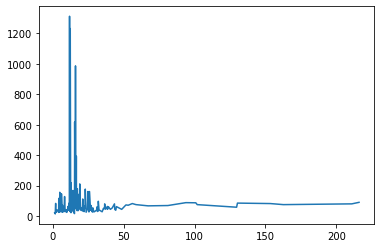

In [76]:
plt.plot(df_g)

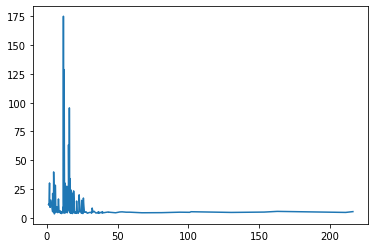

In [77]:
plt.plot(df_distanceXconsume)

In [91]:
corr= df.corr()

In [95]:
def myHeatmap(df):

    """Create a Function for display a HeatMap"""
    sns.set(style='white')  # estilo blanco

    mascara = np.triu(np.ones_like(df, dtype=bool))  # genera una mascara para la triangular superior

    color_map = sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores

    return sns.heatmap(df,  # mapa de calor
                       mask=mascara,
                       cmap=color_map,
                       vmax=1,  # limite vertical
                       center=0,
                       square=True,  # datos como cuadrados
                       linewidth=.5,  # ancho de linea
                       cbar_kws={'shrink': .5}) # barra lateral

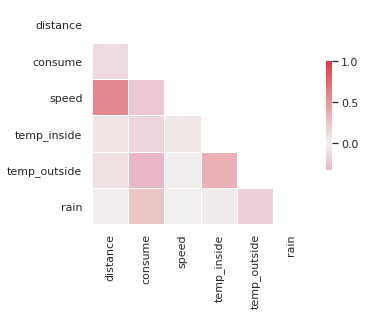

In [96]:
myHeatmap(corr);

Basicamente hay una relacion fuerte entre la distancia y la velocidad. seguramente sea porque a grandes distancias, se meten en una autopista y pueden aumentar la velociadad.



In [ ]:
Combustible

In [144]:
df_gasXspeed=df.groupby('gas_type').mean()['speed']

df_gasXconsume=df.groupby('gas_type').mean()['consume']

df_gasXdistance=df.groupby('gas_type').mean()['distance']

In [141]:
df_gasXspeed

gas_type
E10     43.506250
SP98    40.820175
Name: speed, dtype: float64

In [142]:
df_gasXconsume

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

In [145]:
df_gasXdistance 

gas_type
E10     21.096250
SP98    18.639912
Name: distance, dtype: float64

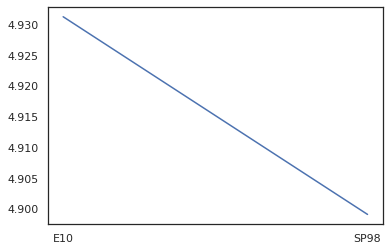

In [155]:
plt.plot(df_gasXconsume)

# Sql

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   rain          388 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.2+ KB


In [153]:
def create_db_sql(df):

    """I create a function that does the whole process with mysql connector to create a database,
     a table inside it and insert all the data from the DataFrame."""

    crea_db = conn.connect(host='localhost', user='root', passwd='admin')
    cursor = crea_db.cursor()
    cursor.execute('drop database if exists cobify')  # if the database exists, delete it
    cursor.execute('create database cobify')  # create database
    cursor.execute('show databases')
    for x in cursor:
        print(x)
    db = conn.connect(host='localhost', user='root', passwd='admin', database='cobify')

    cursor.execute('drop table if exists cobify')  # if the table exists, delete it.

    cursor = db.cursor()
    tabla = '''
        create table cobify(

            id int,
            distance float,
            consume float,
            speed int,
            temp_inside float,
            temp_outside float,
            gas_type varchar(500),
            rain int
        );
    '''

    cursor.execute(tabla)

    for i in range(len(df)):
        insert_query = 'insert into {} ({}) values {};' \
            .format('cobify', ','.join(df.columns), tuple(df.iloc[i].values))

        cursor.execute(insert_query)

    db.commit()

    return print('OK')

In [154]:
create_db_sql(df)

('cobify',)
('information_schema',)
('mobile_fraud',)
('mobile_fraud2',)
('mysql',)
('performance_schema',)
('sys',)


ProgrammingError: 1046 (3D000): No database selected